In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [10]:
%cd /content/drive/My\ Drive/Music Generation/

/content/drive/My Drive/Music Generation


In [11]:
import numpy as np
import pickle
import os
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense, Activation, Embedding, Dropout
from keras.optimizers import Adam, RMSprop
from keras.losses import categorical_crossentropy
from keras.models import save_model
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [12]:
# used to unpickle the pickle data
def unpickle_file(filename):
    """Returns the result of unpickling the file content."""
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [13]:
# Music Data
path_to_data2 = os.path.join(os.getcwd(), 'Music Data.txt')


In [14]:
char2idx_2 = {}
idx2char_2 = {}

f2 = open(path_to_data2).read()
for i,ch in enumerate(sorted(list(set(f2)))):
  char2idx_2[ch] = i
  idx2char_2[i] = ch

print(f'Length of char2idx_2: {len(char2idx_2)}')
print(f'Length of idx2char_2: {len(char2idx_2)}')

print(char2idx_2)
print(idx2char_2)


Length of char2idx_2: 93
Length of idx2char_2: 93
{'\n': 0, ' ': 1, '!': 2, '"': 3, '#': 4, '%': 5, '&': 6, "'": 7, '(': 8, ')': 9, '*': 10, '+': 11, ',': 12, '-': 13, '.': 14, '/': 15, '0': 16, '1': 17, '2': 18, '3': 19, '4': 20, '5': 21, '6': 22, '7': 23, '8': 24, '9': 25, ':': 26, '<': 27, '=': 28, '>': 29, '?': 30, '@': 31, 'A': 32, 'B': 33, 'C': 34, 'D': 35, 'E': 36, 'F': 37, 'G': 38, 'H': 39, 'I': 40, 'J': 41, 'K': 42, 'L': 43, 'M': 44, 'N': 45, 'O': 46, 'P': 47, 'Q': 48, 'R': 49, 'S': 50, 'T': 51, 'U': 52, 'V': 53, 'W': 54, 'X': 55, 'Y': 56, 'Z': 57, '[': 58, '\\': 59, ']': 60, '^': 61, '_': 62, 'a': 63, 'b': 64, 'c': 65, 'd': 66, 'e': 67, 'f': 68, 'g': 69, 'h': 70, 'i': 71, 'j': 72, 'k': 73, 'l': 74, 'm': 75, 'n': 76, 'o': 77, 'p': 78, 'q': 79, 'r': 80, 's': 81, 't': 82, 'u': 83, 'v': 84, 'w': 85, 'x': 86, 'y': 87, 'z': 88, '{': 89, '|': 90, '}': 91, '~': 92}
{0: '\n', 1: ' ', 2: '!', 3: '"', 4: '#', 5: '%', 6: '&', 7: "'", 8: '(', 9: ')', 10: '*', 11: '+', 12: ',', 13: '-', 14

In [15]:
# convert the data with the encodings
encode_data_2 = np.array([char2idx_2[ch] for ch in f2], dtype=np.int32)


In [ ]:
# pickle file 
pickle.dump(encode_data_2, open(os.path.join(os.getcwd(),"pickle_file","data2.pkl"),'wb'))
print("pickle finished")

In [16]:
# Unpickle Files
encode_data_2 = unpickle_file(os.path.join(os.getcwd(),"pickle_file","data2.pkl"))         # 453494 -> Size

In [17]:
print(f'Shape of Encode-data-2: {encode_data_2.shape}')
print(f'Encode Data 2: {encode_data_2}')


Shape of Encode-data-2: (452494,)
Encode Data 2: [55 26  1 ... 26 90  0]


#**Data Generator**

In [18]:
def data_generator(data_encode, batch_size, vocab_size, seq_length):

  # batch_chars: 453494/32 = 14171
  batch_chars = int( data_encode.shape[0] / batch_size )

  # range(0, 14107, 64)
  for start in range(0, batch_chars-seq_length, seq_length):

    # Shape of X: (64, 64)
    # Shape of y: 3D tensor (64, 64, vocab_Size) holds only one-hot encode 
    # values of next character with respect to character in X.

    X = np.zeros((batch_size, seq_length))
    y = np.zeros((batch_size, seq_length, vocab_size))

    for batch_idx in range(0, batch_size):
      for i in range(0, seq_length):

        X[batch_idx, i] = data_encode[batch_chars * batch_idx + start + i]
        y[batch_idx, i, data_encode[batch_chars * batch_idx + start + i + 1]] = 1
    
    yield X,y 


#**Model Building**

In [19]:
def building_model(batch_size, vocab_size, seq_length):


  model = Sequential()

  model.add(Embedding(vocab_size, 512,  batch_input_shape=(batch_size, seq_length)))

  for _ in range(3):
    model.add(LSTM(512, return_sequences=True, stateful=True))
    model.add(Dropout(0.4))

  model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

  return model


In [20]:
BATCH_SIZE = 32
SEQ_LENGTH = 64
EPOCHS = 100

In [21]:
model = building_model(BATCH_SIZE, len(char2idx_2), SEQ_LENGTH)

optimizer = Adam(learning_rate= 0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (32, 64, 512)             47616     
_________________________________________________________________
lstm_1 (LSTM)                (32, 64, 512)             2099200   
_________________________________________________________________
dropout_1 (Dropout)          (32, 64, 512)             0         
_________________________________________________________________
lstm_2 (LSTM)                (32, 64, 512)             2099200   
_________________________________________________________________
dropout_2 (Dropout)          (32, 64, 512)             0         
_________________________________________________________________
lstm_3 (LSTM)                (32, 64, 512)             2099200   
_________________________________________________________________
dropout_3 (Dropout)          (32, 64, 512)            

In [ ]:
save_model(model, "model.png")     # save the structure of the model in png format.

In [ ]:
save_model_freq=20    # Save the model weigths after every 20th epoch
loss_dict = {}       # Saving the average loss after every epoch
accur_dict = {}      # Saving the average accuracy after every epoch

for epoch in range(EPOCHS):

  print(f'\nEpoch {epoch+1}/{EPOCHS}')

  losses, accur = [], []

  for i,(X,y) in enumerate(data_generator(encode_data_2, BATCH_SIZE, len(char2idx_2), SEQ_LENGTH)):

    loss, accuracy = model.train_on_batch(X,y)
    print(f"Batch {i+1} :\t Loss: {loss}\t Accuracy:{accuracy}")
    losses.append(loss)
    accur.append(accuracy)

  
  if (epoch+1)% save_model_freq == 0:
    model.save_weights(os.path.join(os.getcwd(), "Model_Weights", f"model_weight_{epoch+1}.h5"))
  
  loss_dict[epoch+1] = np.average(losses)
  accur_dict[epoch+1] = np.average(accur)
    


Epoch 1/100


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Streaming output truncated to the last 5000 lines.
Batch 106 :	 Loss: 0.34192875027656555	 Accuracy:0.88818359375
Batch 107 :	 Loss: 0.3160620927810669	 Accuracy:0.8984375
Batch 108 :	 Loss: 0.3355720639228821	 Accuracy:0.8896484375
Batch 109 :	 Loss: 0.343915730714798	 Accuracy:0.8818359375
Batch 110 :	 Loss: 0.3332853317260742	 Accuracy:0.8818359375
Batch 111 :	 Loss: 0.3376442492008209	 Accuracy:0.88525390625
Batch 112 :	 Loss: 0.33458757400512695	 Accuracy:0.8896484375
Batch 113 :	 Loss: 0.3120245337486267	 Accuracy:0.89453125
Batch 114 :	 Loss: 0.3325972557067871	 Accuracy:0.8857421875
Batch 115 :	 Loss: 0.32505056262016296	 Accuracy:0.88720703125
Batch 116 :	 Loss: 0.32088083028793335	 Accuracy:0.88623046875
Batch 117 :	 Loss: 0.35128140449523926	 Accuracy:0.884765625
Batch 118 :	 Loss: 0.33645886182785034	 Accuracy:0.88623046875
Batch 119 :	 Loss: 0.31988438963890076	 Accuracy:0.89013671875
Batch 120 :	 Loss: 0.33235111832618713	 Accuracy:0.8876953125
Batch 121 :	 Loss: 0.286041

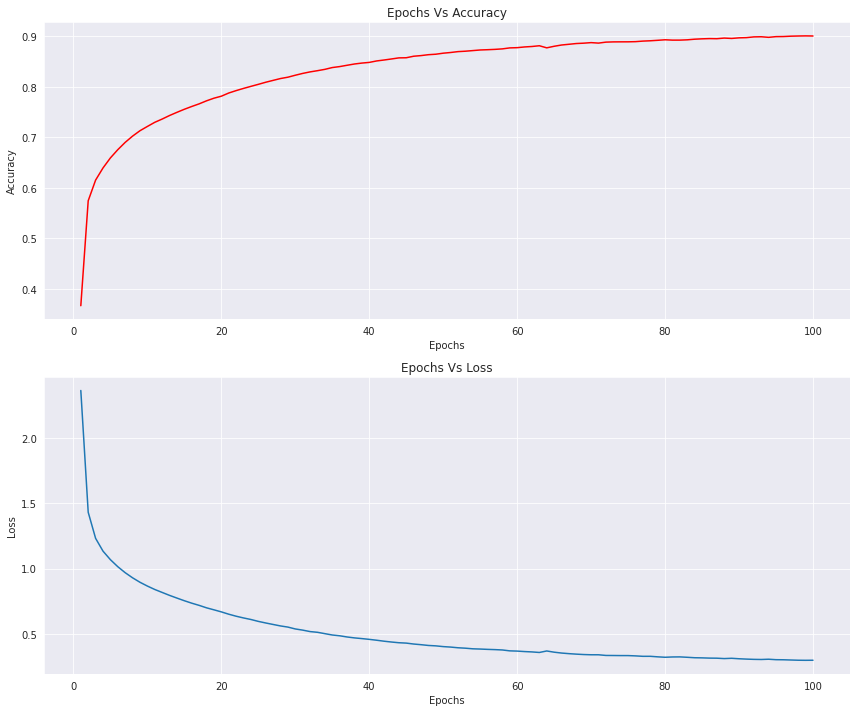

In [ ]:
sns.set_style(style='darkgrid')

plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(list(accur_dict.keys()),list(accur_dict.values()), color='r')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs Vs Accuracy")

plt.subplot(212)
plt.plot(list(loss_dict.keys()), list(loss_dict.values()))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs Vs Loss")
plt.tight_layout()

#**Model Prediction**

In [22]:
def sampling_model(vocab_size):

  '''
    Defining the sampling model because of change in batch_input_shape.
    While training the batch_input shape is (32,64) and during predicting
    it becomes (1,1).
  '''

  model = Sequential()

  model.add(Embedding(vocab_size, 512,  batch_input_shape=(1,1)))

  for _ in range(3):
    model.add(LSTM(512, return_sequences=True, stateful=True))
    model.add(Dropout(0.4))

  model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

  return model


In [23]:
def predicting_output(initial_start, num_chars, char2idx_2, idx2char_2):

  # loading the sampling model and 100th epoch weights in it.
  sample_model = sampling_model(len(char2idx_2))
  sample_model.load_weights(os.path.join(os.getcwd(), "Model_Weights", "model_weight_100.h5"))
  
  # Taking the initial characters for music generation and encode them.
  sampled = [ char2idx_2[i] for i in initial_start]

  # Now initalize the for loop to predict the output for no. of characters long.
  
  for _ in range(num_chars):
    # shape of batch
    batch = np.zeros((1,1), dtype=np.uint8)
    '''
    Checking if sampled length is zero or not
    
    1> If it is not zero then we take the last character
       of the sample and create the batch of size (1,1) and predict the
       next character.
    2> If it is zero then it means user does not provide any initial start
       then we randomly select the character from encodings and send it to 
       the model and then generate the output.
    '''
    if len(sampled)!=0:
      batch[0,0] = sampled[-1]
    else:
      batch[0,0] = np.random.randint(len(char2idx_2))

    result = sample_model.predict_on_batch(batch)
    # shape of result is (1,1,93) here as per the sampling model.
    # np.argmax(result[0,0,:])

    short_sample = np.random.choice(range(len(char2idx_2)), p=result[0,0,:])
    sampled.append(short_sample)
    

  return ''.join(idx2char_2[i] for i in sampled)


In [48]:
model_prediction = predicting_output(' F', 1024, char2idx_2, idx2char_2)

In [49]:
print(model_prediction)

 F2|"G"B3/2^A/2 Bc|
"Em"B3/2c/2 B/2c3/2B|"Am"c2 -c2|"D7"cd ef|"G"g4-|
"D7"d4|"G"dB3|"G"d3/2e/2 d^c|d2 B^G|"Am"A3/2B/2 cB|"D7"AF DF|"G"G2 g3/2f/2|"C"ed cB|"D7"A4|\
"G"G2 G||


X: 6
T:A Mady Milley Sor Birg
% Nottingham Music Database
S:FTB 1/36
K:Em
P:A
B2A2|"G"Gedc "G"B2dB|"Am"cAFA "D7"DFAc|"G"BGBd gdBc|"D7"dedc d2BA|
"G"GFGA BABd|"C"edef g2e2|"G"dcBA "B7"BAGF|"Em"E4 E2:|
P:B
Bc|"Em"defg edBd|"Em"efge "D"d2f2|"Em"efga "D"fedf|"Em"e4 e2:|
K:D
P:B
fg|"D"a2fd Adfa|"Em"g2eg "A7"c2e2|"D"dcde fdef|"Em"gfed "A7"cABc|"D"d2f2 d2:|


X: 22
T:Kilty List Jones
% Nottingham Music Database
S:Kevin Briggs, via EF
P:AABBC
M:4/4
L:1/4
K:G
P:A
g|"G"gd dB|"Am"c3/2B/2 cB|"Am"A/2B/2c/2B/2 "D7"AB|"G"GB "D7"d2|
"G"gf dB|"C"c/2B/2A/2G/2 "D"FA|"Em"GB "D7"dG/2A/2|"G"BG G::
c|"G"Bg g3/2a/2|"G"gd gd|"Am"cA "D7"dd|"G"gg/2a/2 gd|
"G"BG G/2A/2B/2G/2|"Am"cA "D7"Ad|"G"BG Ge/2f/2|"C"gf ed|\
"F"c/2d/2c/2B/2 "D7"A/2G/2F/2A/2|"G"G3||


X: 22
T:Castail Canter
% Nottingham Music Database
S:Loste Dolman, via EF
M:4/4
L:1/4
K

#**Code-Check**

In [ ]:
sample_model = sampling_model(len(char2idx_2))

In [ ]:
temp_batch = np.zeros((1,1))
temp_batch[0,0] = 45
sample_model.load_weights(os.path.join(os.getcwd(), "Model_Weights", "model_weight_100.h5"))
ans = sample_model.predict_on_batch(temp_batch)

In [ ]:
np.argmax(ans[0,0,:])

60

In [ ]:
idx2char_2[89]

'{'

In [ ]:
ans[0,0,:][60]

0.28881156

In [ ]:
ans

array([[[1.0256270e-02, 5.6508765e-02, 1.4620756e-04, 1.6953843e-03,
         3.7289185e-03, 1.7839880e-03, 2.6676450e-03, 1.8442431e-02,
         1.4102252e-02, 1.7243305e-05, 2.0565527e-05, 2.8249962e-04,
         3.1216582e-03, 3.4628558e-04, 3.0123163e-04, 5.6632785e-03,
         7.0345501e-04, 1.0945013e-02, 5.7868060e-02, 2.1291165e-02,
         5.1375549e-02, 3.3648382e-04, 1.1113301e-02, 2.2407314e-03,
         7.4240859e-03, 5.0029233e-02, 9.2724885e-04, 1.6622341e-04,
         3.4048560e-05, 8.2715868e-04, 4.3947060e-04, 5.4153353e-03,
         1.1375732e-04, 3.3874619e-03, 3.4616173e-06, 4.3193308e-05,
         5.3592832e-03, 1.1043265e-03, 2.7460871e-06, 1.7751248e-03,
         1.0250607e-02, 3.5989721e-04, 3.8076672e-03, 9.6322392e-04,
         1.1481519e-03, 1.1255458e-03, 4.8732766e-04, 2.8989384e-02,
         3.8994597e-03, 3.2959166e-03, 2.8167697e-04, 5.8602088e-04,
         5.5134395e-04, 5.0192059e-04, 1.6771903e-04, 1.3172222e-02,
         1.0048307e-02, 1.6699953e

In [ ]:
np.random.choice(range(len(char2idx_2)), p=ans[0,0,:])

89